# NLP Modeling 

1. Get your raw text into a pandas dataframe
2. Tokenize the text - splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens. 
3. Clean the text - this includes removing stopwords, punctuation and stems or lemmatizing 
4. Vectorize the text - convert the text to numeric form 
5. Fit/train an ML and/or deep learning model 


In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_colwidth', 100)

from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

import re #regular expressions for pattern searching 
import string
import nltk

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split


df = pd.read_csv("/Users/amberyandow/Downloads/superheroes_nlp_dataset.csv")
df.head()

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track star and competed in the Olympic Games. After he t...",NaN,85,30,60,60,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,514A (Gotham),Bruce Wayne,NaN,10,He was one of the many prisoners of Indian Hill to be transferred to another facility upstate on...,NaN,100,20,30,50,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young age, and after being expelled from several orphana...","On rare occasions, and through unusual circumstances, Jones has been able to tap into a myster...",80,100,80,100,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Aa,Aa,NaN,12,Aa is one of the more passive members of the Pumice People race of Stoneworld. When Hal Jordan a...,NaN,80,50,55,45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aaron Cash,Aaron Cash,Aaron Cash,5,Aaron Cash is the head of security at Arkham Asylum. He has a hook for a hand after his real han...,NaN,80,10,25,40,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 81 columns):
name                                1448 non-null object
real_name                           1301 non-null object
full_name                           956 non-null object
overall_score                       1450 non-null object
history_text                        1360 non-null object
powers_text                         1086 non-null object
intelligence_score                  1450 non-null int64
strength_score                      1450 non-null int64
speed_score                         1450 non-null int64
durability_score                    1450 non-null int64
power_score                         1450 non-null int64
combat_score                        1450 non-null int64
superpowers                         1450 non-null object
alter_egos                          1450 non-null object
aliases                             1450 non-null object
place_of_birth                      788 non-n

In [3]:
df = df[['name', 'history_text', 'creator', 'alignment']]
df.head()

,name,history_text,creator,alignment
0,3-D Man,"Delroy Garrett, Jr. grew up to become a track star and competed in the Olympic Games. After he t...",Marvel Comics,Good
1,514A (Gotham),He was one of the many prisoners of Indian Hill to be transferred to another facility upstate on...,DC Comics,NaN
2,A-Bomb,"Richard ""Rick"" Jones was orphaned at a young age, and after being expelled from several orphana...",Marvel Comics,Good
3,Aa,Aa is one of the more passive members of the Pumice People race of Stoneworld. When Hal Jordan a...,DC Comics,Good
4,Aaron Cash,Aaron Cash is the head of security at Arkham Asylum. He has a hook for a hand after his real han...,DC Comics,Good


In [4]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1167 entries, 0 to 1449
Data columns (total 4 columns):
name            1167 non-null object
history_text    1167 non-null object
creator         1167 non-null object
alignment       1167 non-null object
dtypes: object(4)
memory usage: 45.6+ KB


In [5]:
df.alignment.value_counts()

Good       690
Bad        383
Neutral     94
Name: alignment, dtype: int64

## Create a pipeline to clean our text 

1. Remove punctuation
2. Tokenization
3. Remove stopwords
4. Lemmatize/Stem

In [6]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
def clean_history(history):
    history = "".join([word for word in history if word not in string.punctuation])
    tokens = re.split('\W+', history)
    history = [wn.lemmatize(word) for word in tokens if word not in stopwords]
    return history

df['history_clean'] = df['history_text'].apply(lambda x: clean_history(x.lower()))



In [8]:
df.head()

,name,history_text,creator,alignment,history_clean
0,3-D Man,"Delroy Garrett, Jr. grew up to become a track star and competed in the Olympic Games. After he t...",Marvel Comics,Good,"[delroy, garrett, jr, grew, become, track, star, competed, olympic, game, tested, positive, ster..."
2,A-Bomb,"Richard ""Rick"" Jones was orphaned at a young age, and after being expelled from several orphana...",Marvel Comics,Good,"[, richard, rick, jones, orphaned, young, age, expelled, several, orphanage, disciplinary, reaso..."
3,Aa,Aa is one of the more passive members of the Pumice People race of Stoneworld. When Hal Jordan a...,DC Comics,Good,"[aa, one, passive, member, pumice, people, race, stoneworld, hal, jordan, attempted, restart, gr..."
4,Aaron Cash,Aaron Cash is the head of security at Arkham Asylum. He has a hook for a hand after his real han...,DC Comics,Good,"[aaron, cash, head, security, arkham, asylum, hook, hand, real, hand, eaten, killer, croc]"
5,Aayla Secura,ayla Secura was a Rutian Twi'lek Jedi Knight (and onetime apprentice to Quinlan Vos) who served ...,George Lucas,Good,"[ayla, secura, rutian, twilek, jedi, knight, onetime, apprentice, quinlan, vos, served, clone, w..."


In [9]:
df_good = df.loc[df['alignment'] == 'Good']
df_good.head()

,name,history_text,creator,alignment,history_clean
0,3-D Man,"Delroy Garrett, Jr. grew up to become a track star and competed in the Olympic Games. After he t...",Marvel Comics,Good,"[delroy, garrett, jr, grew, become, track, star, competed, olympic, game, tested, positive, ster..."
2,A-Bomb,"Richard ""Rick"" Jones was orphaned at a young age, and after being expelled from several orphana...",Marvel Comics,Good,"[, richard, rick, jones, orphaned, young, age, expelled, several, orphanage, disciplinary, reaso..."
3,Aa,Aa is one of the more passive members of the Pumice People race of Stoneworld. When Hal Jordan a...,DC Comics,Good,"[aa, one, passive, member, pumice, people, race, stoneworld, hal, jordan, attempted, restart, gr..."
4,Aaron Cash,Aaron Cash is the head of security at Arkham Asylum. He has a hook for a hand after his real han...,DC Comics,Good,"[aaron, cash, head, security, arkham, asylum, hook, hand, real, hand, eaten, killer, croc]"
5,Aayla Secura,ayla Secura was a Rutian Twi'lek Jedi Knight (and onetime apprentice to Quinlan Vos) who served ...,George Lucas,Good,"[ayla, secura, rutian, twilek, jedi, knight, onetime, apprentice, quinlan, vos, served, clone, w..."


In [10]:
df_bad = df.loc[df['alignment'] == 'Bad']
df_bad.head()

,name,history_text,creator,alignment,history_clean
8,Abomination,"Formerly known as Emil Blonsky, a spy of Soviet Yugoslavian origin working for the KGB, the Abom...",Marvel Comics,Bad,"[formerly, known, emil, blonsky, spy, soviet, yugoslavian, origin, working, kgb, abomination, ga..."
9,Abra Kadabra (CW),"""Abra Kadabra"" was a criminal time traveler from the 64th century. He had outfitted his body wit...",DC Comics,Bad,"[abra, kadabra, criminal, time, traveler, 64th, century, outfitted, body, futuristic, nanotechno..."
10,Abra Kadabra,"Citizen Abra was a stage magician in the 64th Century, going by the name Abra Kadabra",DC Comics,Bad,"[citizen, abra, stage, magician, 64th, century, going, name, abra, kadabra]"
11,Abraxas,"Born within the abstract entity Eternity, Abraxas was kept in check throughout the Multiverse by...",Marvel Comics,Bad,"[born, within, abstract, entity, eternity, abraxas, kept, check, throughout, multiverse, existen..."
13,Absorbing Man,"Before he turned to crime, Creel fought as a boxer, at one point facing ""Battling Jack"" Murdoc...",Marvel Comics,Bad,"[, turned, crime, creel, fought, boxer, one, point, facing, battling, jack, murdock, ring, ringn..."


In [11]:
df_neutral = df.loc[df['alignment'] == 'Neutral']
df_neutral.head()

,name,history_text,creator,alignment,history_clean
45,Amanda Waller,Amanda Waller has been established as a widow who escaped Chicago's Cabrini–Green housing projec...,DC Comics,Neutral,"[amanda, waller, established, widow, escaped, chicago, cabrini, green, housing, project, survivi..."
59,Angela,"Aldrif Odinsdottir was the firstborn of Odin and Freyja, and heir to the Asgardian throne",Marvel Comics,Neutral,"[aldrif, odinsdottir, firstborn, odin, freyja, heir, asgardian, throne]"
150,Bekka,"As a young Genesisian, Bekka developed the unconscious ability to project feelings of love to ev...",DC Comics,Neutral,"[young, genesisian, bekka, developed, unconscious, ability, project, feeling, love, everyone, ar..."
153,Beyonder,"Within a pocket realm in the Negative Zone, the omnipotent, enigmatic Beyonders created discrete...",Marvel Comics,Neutral,"[within, pocket, realm, negative, zone, omnipotent, enigmatic, beyonders, created, discrete, pac..."
168,Bizarro-Girl,"The first Bizarro Supergirl was a duplicate of Supergirl, created by Bizarro Jr. using the ""du...",DC Comics,Neutral,"[, first, bizarro, supergirl, duplicate, supergirl, created, bizarro, jr, using, duplicating, ma..."


In [12]:
#most frequent and least frequent words 
good_list = []  # list containing all words of all texts
for x in df_good['history_clean']:  # loop over lists in df
    good_list += x  # append elements of lists to full list

good_val_counts = pd.Series(good_list).value_counts()  # make temporary Series to count
good_val_counts

new                1581
power              1531
time               1524
one                1352
would              1256
team               1236
later              1229
sonic              1150
however            1075
back               1019
mutant              927
xmen                919
earth               896
also                895
life                892
help                839
could               805
battle              778
man                 777
world               760
death               739
became              733
found               722
returned            695
first               686
member              672
hero                666
two                 665
left                644
fight               642
                   ... 
vainly                1
gls                   1
garbled               1
coronation            1
morally               1
safehouses            1
medusalith            1
chef                  1
comer                 1
tripline              1
arlington       

In [13]:
#most frequent and least frequent words 
bad_list = []  # list containing all words of all texts
for x in df_bad['history_clean']:  # loop over lists in df
    bad_list += x  # append elements of lists to full list

bad_val_counts = pd.Series(bad_list).value_counts()  # make temporary Series to count
bad_val_counts

power             681
time              568
one               521
would             513
new               509
later             426
however           404
earth             352
magneto           348
body              342
man               322
life              318
mutant            308
death             301
became            296
also              292
world             285
spiderman         281
back              276
could             275
battle            275
killed            274
eventually        263
defeated          260
batman            259
used              249
first             232
year              231
force             230
city              230
                 ... 
bby                 1
descent             1
illusive            1
rope                1
cataphylaxis        1
jackal              1
chronicle           1
rewarded            1
dispersal           1
biotechnology       1
csas                1
telemetrically      1
coexist             1
macon               1
mkd       

In [14]:
#most frequent and least frequent words 
neutral_list = []  # list containing all words of all texts
for x in df_neutral['history_clean']:  # loop over lists in df
    neutral_list += x  # append elements of lists to full list

neutral_val_counts = pd.Series(neutral_list).value_counts()  # make temporary Series to count
neutral_val_counts

hulk              192
deadpool          187
power             165
would             161
one               145
later             141
new               138
caulifla          135
time              125
goku              121
kale              120
cain              115
however           115
fight             104
death             104
earth              99
could              98
two                97
team               95
kill               91
red                88
back               88
universe           88
battle             87
became             85
deathstroke        80
first              76
life               76
lobo               76
also               75
                 ... 
chair               1
highclass           1
shied               1
unharmed            1
priestess           1
nasty               1
aryan               1
foreseeable         1
bettys              1
pouch               1
nelson              1
scorpionlike        1
norrin              1
blackout            1
constraint

In [15]:
from textblob import TextBlob, Word
from wordcloud import WordCloud



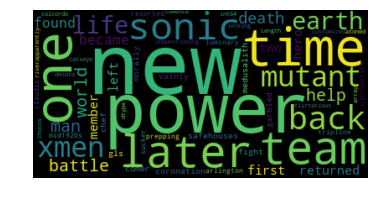

<Figure size 1440x720 with 0 Axes>

In [16]:
wordcloud = WordCloud(max_words=100, width=400, height=200).generate(str(good_val_counts))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.figure(figsize=(20,10))
plt.show()

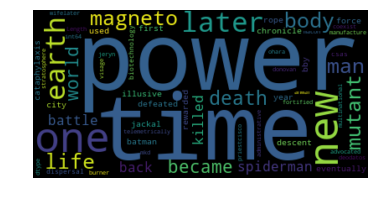

<Figure size 1440x720 with 0 Axes>

In [17]:
wordcloud = WordCloud(max_words=100, width=400, height=200).generate(str(bad_val_counts))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.figure(figsize=(20,10))
plt.show()

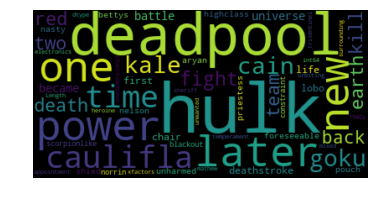

<Figure size 1440x720 with 0 Axes>

In [18]:
wordcloud = WordCloud(max_words=100, width=400, height=200).generate(str(neutral_val_counts))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.figure(figsize=(20,10))
plt.show()

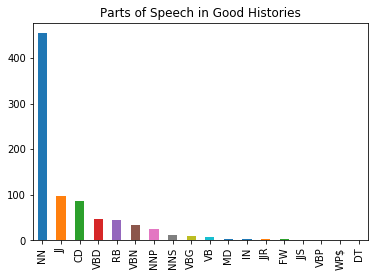

In [19]:
blob = TextBlob(str(df_good['history_clean']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(kind='bar', title="Parts of Speech in Good Histories" )

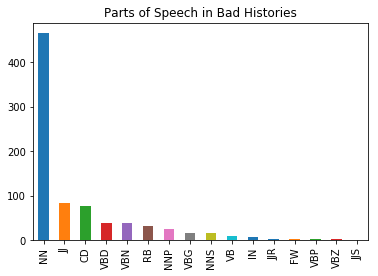

In [20]:
blob = TextBlob(str(df_bad['history_clean']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(kind='bar', title="Parts of Speech in Bad Histories")

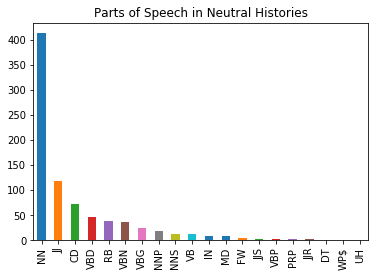

In [21]:
blob = TextBlob(str(df_neutral['history_clean']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(kind='bar', title="Parts of Speech in Neutral Histories")

In [22]:
(pd.Series(nltk.ngrams(good_list, 2)).value_counts())[:20]

(new, york)            218
(iron, man)            188
(captain, america)     179
(justice, league)      161
(wonder, woman)        155
(new, mutant)          143
(fantastic, four)      128
(chaos, emerald)       122
(speed, force)         116
(green, lantern)       109
(iron, fist)           106
(professor, x)          93
(united, state)         89
(year, later)           86
(sonic, tail)           83
(bruce, wayne)          81
(mary, jane)            79
(weapon, x)             77
(hellfire, club)        77
(professor, xavier)     76
dtype: int64

In [23]:
(pd.Series(nltk.ngrams(bad_list, 2)).value_counts())[:20]

(swamp, thing)        132
(iron, man)           106
(new, york)           102
(captain, america)     88
(shao, kahn)           81
(wonder, woman)        56
(fantastic, four)      53
(year, later)          52
(gotham, city)         45
(green, lantern)       45
(york, city)           42
(new, mutant)          39
(justice, league)      37
(yellow, claw)         35
(black, adam)          33
(world, war)           33
(united, state)        30
(speed, force)         29
(used, power)          29
(green, goblin)        28
dtype: int64

In [24]:
(pd.Series(nltk.ngrams(neutral_list, 2)).value_counts())[:20]

(red, hulk)            53
(super, saiyan)        53
(green, lantern)       20
(captain, universe)    20
(healing, factor)      20
(new, york)            20
(caulifla, kale)       18
(red, lantern)         17
(suicide, squad)       16
(black, lantern)       15
(imperial, guard)      14
(black, tom)           14
(saiyan, 3)            14
(green, arrow)         13
(sinestro, corp)       13
(lantern, corp)        12
(hal, jordan)          12
(fight, goku)          12
(vril, dox)            12
(dox, ii)              11
dtype: int64

## Vectorizing History Text: TF-IDF

In [25]:
tfidf_vect = TfidfVectorizer(analyzer=clean_history, ngram_range =(2, 2))
X_tfidf = tfidf_vect.fit_transform(df['history_text'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(1167, 33977)
['', '0', '002', '0068', '01', '03', '030', '071', '08', '084', '09', '1', '10', '100', '1000', '10000', '100000', '1000000', '1000000000', '100feet', '100thfloor', '100year', '101', '1014', '103', '105', '107th', '1090', '10ft', '10th', '10yearold', '11', '1165', '117', '118', '1191', '11th', '11yearold', '12', '120', '1200', '12000', '121', '122', '1257', '12th', '13', '132', '1383', '13foot', '13th', '14', '1400', '1417', '142', '145', '1459', '1476', '1479', '14yearsold', '15', '150', '1500', '15000', '1503', '1513', '152', '1524', '154600706', '1576', '1591', '15yearold', '16', '1600s', '1602', '1610', '1630', '1666', '167', '168', '1691', '1692', '1698', '16bit', '16th', '17', '170000', '170000Year', '1748', '1792', '1797', '17th', '17thcentury', '18', '18000', '1800s', '180degree', '180lbs', '1820s', '183', '1839', '183rd', '1854', '1860s', '1865', '1868', '1872', '1873', '1880', '1880s', '1882', '1888', '1890s', '1892', '1895', '1897', '1899', '18th', '19', '1900s

#### Vectorizers output sparse matrices

_**Sparse Matrix**: A matrix in which most entries are 0. In the interest of efficient storage, a sparse matrix will be stored by only storing the locations of the non-zero elements._

In [26]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names()
X_tfidf_df.head()

,,0,002,0068,01,03,030,071,08,084,...,Ланья,Петровна,Сергеевна,Тёмная,الساحر,الغول,رأس,アーカード,拳王,駄犬
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.014109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Getting top ranking features 
sums = X_tfidf.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(X_tfidf_df.columns): 
    data1.append( (term, sums[0, col] )) 
ranking = pd.DataFrame(data1, columns = ['term', 'rank']) 
words = (ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords : \n", words.head(10)) 



Words : 
          term       rank
6223       He  26.187425
14051     The  25.710095
27679   power  20.276048
12622     She  17.004136
32232    time  16.772060
26665     one  16.193070
33834   would  16.061626
26072  mutant  14.734966
643     After  14.282582
24765   later  13.582172


## Feature Engineering 

In [28]:
df['history_len'] = df['history_text'].apply(lambda x: len(x) - x.count(" ")) #subtracting whitespace
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1167 entries, 0 to 1449
Data columns (total 6 columns):
name             1167 non-null object
history_text     1167 non-null object
creator          1167 non-null object
alignment        1167 non-null object
history_clean    1167 non-null object
history_len      1167 non-null int64
dtypes: int64(1), object(5)
memory usage: 63.8+ KB


/Users/amberyandow/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


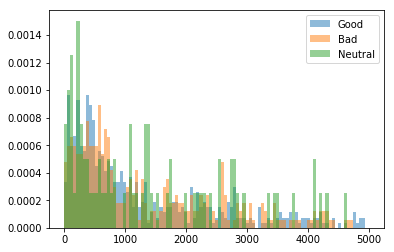

In [30]:
bins = np.linspace(0, 5000, 100)
plt.hist(df[df['alignment'] == 'Good']['history_len'], bins, alpha=0.5, normed=True, label='Good')
plt.hist(df[df['alignment'] == 'Bad']['history_len'], bins, alpha=0.5, normed=True, label='Bad')
plt.hist(df[df['alignment'] == 'Neutral']['history_len'], bins, alpha=0.5, normed=True, label='Neutral')
plt.legend(loc='upper right')
plt.show()

In [31]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3) * 100

df['percent_punct'] = df['history_text'].apply(lambda x: count_punct(x))
df.head()

,name,history_text,creator,alignment,history_clean,history_len,percent_punct
0,3-D Man,"Delroy Garrett, Jr. grew up to become a track star and competed in the Olympic Games. After he t...",Marvel Comics,Good,"[delroy, garrett, jr, grew, become, track, star, competed, olympic, game, tested, positive, ster...",426,3.5
2,A-Bomb,"Richard ""Rick"" Jones was orphaned at a young age, and after being expelled from several orphana...",Marvel Comics,Good,"[, richard, rick, jones, orphaned, young, age, expelled, several, orphanage, disciplinary, reaso...",4849,3.0
3,Aa,Aa is one of the more passive members of the Pumice People race of Stoneworld. When Hal Jordan a...,DC Comics,Good,"[aa, one, passive, member, pumice, people, race, stoneworld, hal, jordan, attempted, restart, gr...",4933,3.0
4,Aaron Cash,Aaron Cash is the head of security at Arkham Asylum. He has a hook for a hand after his real han...,DC Comics,Good,"[aaron, cash, head, security, arkham, asylum, hook, hand, real, hand, eaten, killer, croc]",98,2.0
5,Aayla Secura,ayla Secura was a Rutian Twi'lek Jedi Knight (and onetime apprentice to Quinlan Vos) who served ...,George Lucas,Good,"[ayla, secura, rutian, twilek, jedi, knight, onetime, apprentice, quinlan, vos, served, clone, w...",637,2.2


/Users/amberyandow/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


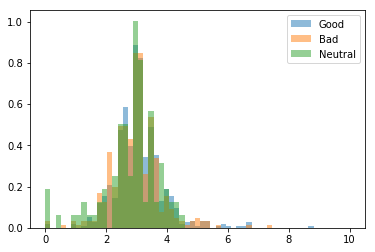

In [32]:
bins = np.linspace(0, 10, 60)
plt.hist(df[df['alignment'] == 'Good']['percent_punct'], bins, alpha=0.5, normed=True, label='Good')
plt.hist(df[df['alignment'] == 'Bad']['percent_punct'], bins, alpha=0.5, normed=True, label='Bad')
plt.hist(df[df['alignment'] == 'Neutral']['percent_punct'], bins, alpha=0.5, normed=True, label='Neutral')
plt.legend(loc='upper right')
plt.show()

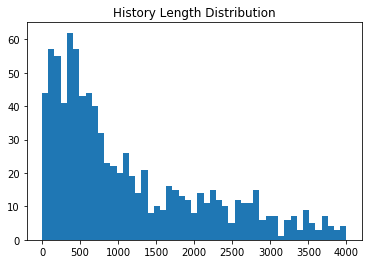

In [33]:
bins = np.linspace(0, 4000, 50)

plt.hist(df['history_len'], bins)
plt.title("History Length Distribution")
plt.show()

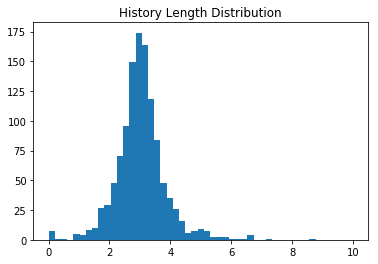

In [34]:
bins = np.linspace(0, 10, 50)

plt.hist(df['percent_punct'], bins)
plt.title("History Length Distribution")
plt.show()

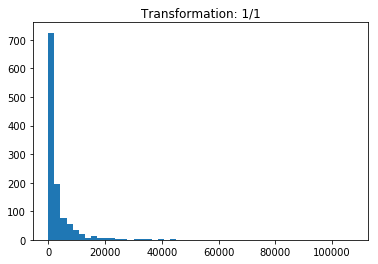

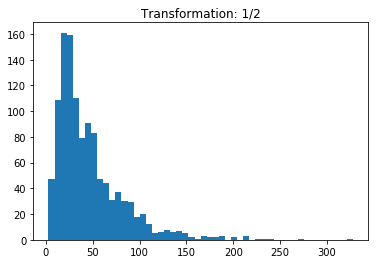

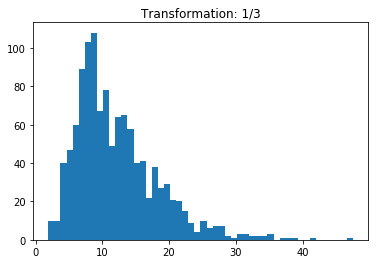

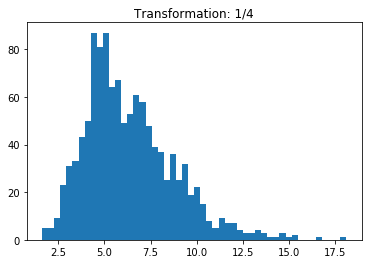

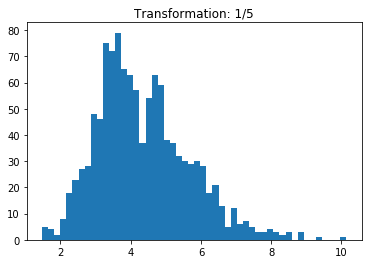

In [35]:
for i in [1, 2, 3, 4, 5]:
    plt.hist((df['history_len'])**(1/i), bins=50)
    plt.title("Transformation: 1/{}".format(str(i)))
    plt.show()

In [36]:
df['history_len'] = round(df['history_len']**(1/i), 2)

In [37]:
new_features_df = df[['history_len', 'percent_punct', 'alignment']]

In [38]:
alignment_dict = {'Good': 0, 'Bad': 1, 'Neutral': 2}

In [39]:
new_features_df['alignment'] = [alignment_dict[item] for item in new_features_df.alignment]

/Users/amberyandow/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
X_tfidf_df.reset_index(drop=True, inplace=True)
new_features_df.reset_index(drop=True, inplace=True)

In [41]:
X = pd.concat([new_features_df, X_tfidf_df], axis=1)
X.head()

,history_len,percent_punct,alignment,,0,002,0068,01,03,030,...,Ланья,Петровна,Сергеевна,Тёмная,الساحر,الغول,رأس,アーカード,拳王,駄犬
0,3.36,3.5,0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.46,3.0,0,0.014109,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.48,3.0,0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.50,2.0,0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.64,2.2,0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
X.drop(['alignment'], axis=1, inplace=True)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, new_features_df['alignment'], test_size=0.3)

In [44]:
rf = RandomForestClassifier(class_weight='balanced', n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

In [45]:
rf_model.score(X_train, y_train)

0.9803921568627451

In [46]:
rf_model.score(X_test, y_test)

0.6809116809116809

## RNNs 

#### TF-IDF

![](https://image.slidesharecdn.com/9bc43139-1398-4c31-a9cf-ed08dd37ef13-150521205535-lva1-app6891/95/text-mining-association-rules-and-decision-tree-learning-26-638.jpg?cb=1432241853)

#### Word-to-Vec
- The skip gram 
![](https://media.geeksforgeeks.org/wp-content/uploads/word2vec_diagram-1.jpg)

- Cosine Similarity
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/07/img_8.png)
![](https://www.mathsisfun.com/algebra/images/cosine-graph.svg)

#### Recurrent Neural Networks 
- A recurrent neural network (RNN) is a type of artificial neural network commonly used in speech recognition and natural language processing (NLP). RNNs are designed to recognize a data's sequential characteristics and use patterns to predict the next likely scenario.  RNN unlike feed forward neural networks(think CNNs) - can use their internal memory to process arbitrary sequences of inputs.
[Turtorials Point - CNNs vs. RNNs](https://www.tutorialspoint.com/tensorflow/tensorflow_cnn_and_rnn_difference.htm)
![](https://www.nexmo.com/wp-content/uploads/2020/10/Recurrent-neural-network.png)

In [74]:
import gensim 
import gensim.downloader as api 

wiki_embeddings = api.load('glove-wiki-gigaword-100')

/Users/amberyandow/anaconda3/envs/learn-env/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [75]:
wiki_embeddings['queen']

array([-0.50045 , -0.70826 ,  0.55388 ,  0.673   ,  0.22486 ,  0.60281 ,
       -0.26194 ,  0.73872 , -0.65383 , -0.21606 , -0.33806 ,  0.24498 ,
       -0.51497 ,  0.8568  , -0.37199 , -0.58824 ,  0.30637 , -0.30668 ,
       -0.2187  ,  0.78369 , -0.61944 , -0.54925 ,  0.43067 , -0.027348,
        0.97574 ,  0.46169 ,  0.11486 , -0.99842 ,  1.0661  , -0.20819 ,
        0.53158 ,  0.40922 ,  1.0406  ,  0.24943 ,  0.18709 ,  0.41528 ,
       -0.95408 ,  0.36822 , -0.37948 , -0.6802  , -0.14578 , -0.20113 ,
        0.17113 , -0.55705 ,  0.7191  ,  0.070014, -0.23637 ,  0.49534 ,
        1.1576  , -0.05078 ,  0.25731 , -0.091052,  1.2663  ,  1.1047  ,
       -0.51584 , -2.0033  , -0.64821 ,  0.16417 ,  0.32935 ,  0.048484,
        0.18997 ,  0.66116 ,  0.080882,  0.3364  ,  0.22758 ,  0.1462  ,
       -0.51005 ,  0.63777 ,  0.47299 , -0.3282  ,  0.083899, -0.78547 ,
        0.099148,  0.039176,  0.27893 ,  0.11747 ,  0.57862 ,  0.043639,
       -0.15965 , -0.35304 , -0.048965, -0.32461 , 

In [78]:
wiki_embeddings.most_similar('dinosaur')

[('dinosaurs', 0.7567510604858398),
 ('sauropod', 0.7348016500473022),
 ('fossils', 0.733399510383606),
 ('theropod', 0.7266383767127991),
 ('fossilized', 0.7137298583984375),
 ('mammal', 0.6739211082458496),
 ('fossil', 0.666165292263031),
 ('reptile', 0.6555225849151611),
 ('skeletons', 0.6396444439888),
 ('hominid', 0.6298700571060181)]

In [72]:
w2v_model = gensim.models.Word2Vec(X_train,
                                   size=100,
                                   window=5,
                                   min_count=2)

In [73]:
w2v_model.wv('one')

TypeError: 'Word2VecKeyedVectors' object is not callable

In [52]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(new_features_df['alignment'])
encoded_Y = encoder.transform(new_features_df['alignment'])
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

Using TensorFlow backend.


In [53]:
rnn_X_train, rnn_X_test, rnn_y_train, rnn_y_test = train_test_split(df['history_text'],
                                                                    dummy_y,
                                                                    test_size=0.3)

In [54]:
from keras.preprocessing.text import Tokenizer #clean and tokenize the data 
from keras.preprocessing.sequence import pad_sequences

This will clean and tokenize our dataset. Also, it will build a vocabulary of all of the words in our training set and assign it an index. 

In [55]:
# Initialize and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(rnn_X_train)

In [56]:
X_train_seq = tokenizer.texts_to_sequences(rnn_X_train)
X_test_seq = tokenizer.texts_to_sequences(rnn_X_test)

In [57]:
# What do these sequences look like? Each integer represents a word in the first text history, this is the 1st text history
X_train_seq[0]

[13155,
 17138,
 7,
 332,
 8,
 2141,
 19,
 7,
 27,
 1438,
 1111,
 279,
 1553,
 13,
 5015,
 3977,
 871,
 2,
 13156,
 8,
 5,
 4194,
 1624,
 2,
 1357,
 1,
 1418,
 1887,
 5016,
 393,
 198,
 10,
 73,
 2208,
 9339,
 407,
 7444,
 17139,
 3,
 67,
 17140,
 1,
 17141,
 31,
 5015,
 123,
 2,
 8261,
 4710,
 5,
 658,
 8262,
 8,
 14,
 803,
 48,
 9340,
 14,
 6155,
 1554,
 359,
 19,
 64,
 6732,
 5,
 3503,
 4,
 240,
 117,
 12,
 9341,
 134,
 14,
 1126,
 66,
 2,
 13157,
 1,
 1760,
 4,
 14,
 10920,
 1207,
 40,
 43,
 4,
 29,
 188,
 3,
 42,
 13158,
 34,
 10,
 1,
 1960,
 9341,
 582,
 81,
 6156,
 7,
 5,
 17142,
 1718,
 16,
 1,
 437,
 6157,
 210,
 51,
 29,
 82,
 274,
 19,
 64,
 353,
 184,
 39,
 47,
 1498,
 16,
 5,
 324,
 302,
 117,
 12,
 1,
 17143,
 1923,
 13,
 7444,
 2,
 320,
 6,
 355,
 804,
 1,
 1887,
 538,
 81,
 6156,
 642,
 59,
 393,
 10,
 5015,
 19,
 7,
 5,
 1111,
 279,
 3,
 47,
 1,
 1055,
 7,
 10921,
 25,
 7,
 45,
 5,
 9342,
 9343,
 74,
 19,
 2889,
 31,
 1,
 1044,
 2,
 5342,
 1805,
 4711,
 4,
 1055,
 10,


In [58]:
# Pad the sequences so each sequence is the same length

X_train_seq_padded = pad_sequences(X_train_seq, 50) 
X_test_seq_padded = pad_sequences(X_test_seq, 50) 

In [59]:
# What do these padded sequences look like?
X_train_seq_padded[0]

array([ 516,  174,   14,   58, 5706, 2798,  603,   19,  100,   25,   18,
          8,   35,  715,   19,   64,  225,  583,  636,    3,  184,  665,
          3,    7, 1480,    2, 1556,   14,  137,   17,   61,  734,   13,
        516,   54,   25,   24, 2629,   11,   81, 6156, 2267,    2,  995,
         10,    1, 1529,    5,  287, 3001], dtype=int32)

In [60]:
# Import the tools needed from keras and define functions to calculate recall and precision
import keras.backend as K
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

In [61]:
# Construct a simple RNN model
model = Sequential()

model.add(Embedding(len(tokenizer.index_word)+1, 32))
model.add(LSTM(32, dropout=0, recurrent_dropout=0))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax')) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          866464    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 875,939
Trainable params: 875,939
Non-trainable params: 0
_________________________________________________________________


In [62]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', precision_m, recall_m])

In [63]:
# Fit the RNN model
history = model.fit(X_train_seq_padded, rnn_y_train, 
                    batch_size=32, epochs=10,
                    validation_data=(X_test_seq_padded, rnn_y_test))

/Users/amberyandow/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/indexed_slices.py:353: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 816 samples, validate on 351 samples
Epoch 1/10
816/816 [==============================] - 1s 2ms/step - loss: 1.0181 - accuracy: 0.5637 - precision_m: 0.0986 - recall_m: 0.0986 - val_loss: 0.9141 - val_accuracy: 0.5812 - val_precision_m: 0.5815 - val_recall_m: 0.5815
Epoch 2/10
816/816 [==============================] - 1s 744us/step - loss: 0.8854 - accuracy: 0.5956 - precision_m: 0.6460 - recall_m: 0.5661 - val_loss: 0.8842 - val_accuracy: 0.5812 - val_precision_m: 0.5815 - val_recall_m: 0.5815
Epoch 3/10
816/816 [==============================] - 1s 732us/step - loss: 0.8469 - accuracy: 0.5956 - precision_m: 0.5991 - recall_m: 0.5974 - val_loss: 0.8782 - val_accuracy: 0.5812 - val_precision_m: 0.5759 - val_recall_m: 0.5701
Epoch 4/10
816/816 [==============================] - 1s 741us/step - loss: 0.7092 - accuracy: 0.5980 - precision_m: 0.6839 - recall_m: 0.5865 - val_loss: 0.9147 - val_accuracy: 0.5812 - val_precision_m: 0.6326 - val_recall_m: 0.4931
Epoch 5/10
816/816 [